In [1]:
%matplotlib inline

In [2]:
import datajoint as dj

In [3]:
dj.list_schemas()

Connecting dimitri@db.data-science-ust.net:3306


['dimitri_showcase', 'dimitri_uni', 'dimitri_university']

In [4]:
import datajoint as dj
schema = dj.schema('dimitri_university')
schema.spawn_missing_classes()

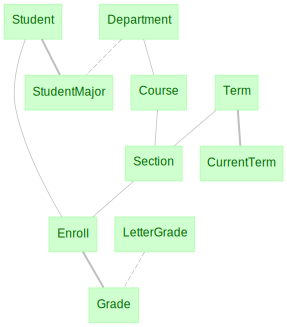

In [6]:
dj.Diagram(schema)

In [7]:
dj.U().aggr(Student(), n='count(*)')

n calculated attribute
4000


In [8]:
dj.U('birth_year').aggr(Student.proj(birth_year='year(date_of_birth)'), n='count(*)').make_sql()

'SELECT `birth_year`,count(*) as `n` FROM (SELECT `student_id`,year(date_of_birth) as `birth_year` FROM `dimitri_university`.`student`) as `_s8` GROUP  BY `birth_year`'

In [12]:
dj.U('birth_year') & Student.proj(birth_year='year(date_of_birth)')

birth_year calculated attribute
1998
1986
1999
2000
2001
1997
1993
2003
1990
1989


In [15]:
Student.describe();

student_id           : int unsigned                 # university-wide ID number
---
first_name           : varchar(40)                  
last_name            : varchar(40)                  
sex                  : enum('F','M','U')            
date_of_birth        : date                         
home_address         : varchar(120)                 # mailing street address
home_city            : varchar(60)                  # mailing address
home_state           : char(2)                      # US state acronym: e.g. OH
home_zip             : char(10)                     # zipcode e.g. 93979-4979
home_phone           : varchar(20)                  # e.g. 414.657.6883x0881



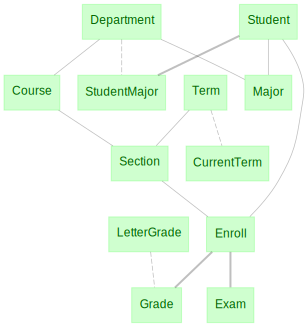

In [9]:
dj.ERD(schema)

In [10]:
dj.U().aggr(Student, n='count(*)')

n calculated attribute
8000


In [11]:
StudentMajor()

student_id university-wide ID number,"dept abbreviated department name, e.g. BIOL",declare_date when student declared her major
1000,CS,2014-07-25
1001,CS,2001-03-22
1002,MATH,2005-09-20
1004,BIOL,2011-11-03
1006,MATH,2002-05-13
1008,BIOL,2003-03-22
1010,BIOL,2015-12-23
1011,MATH,2007-02-04
1012,MATH,2007-10-30
1014,BIOL,2008-07-07


In [16]:
LetterGrade.aggr(Grade & CurrentTerm & 'dept="MATH"', n='count(*)')

dj.U('grade').aggr(Grade & CurrentTerm & 'dept="MATH"', n='count(*)')

grade,n calculated attribute
A,1
C,1
C-,1
D+,1


# Example queries

## Restriction

In [17]:
# Students from Texas
Student & {'home_state': 'TX'}
Student & 'home_state="TX"'

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1047,David,Gardner,M,1988-06-12,7468 Smith Shoal Suite 966,Lake Jaredtown,TX,55370,001-478-924-8879x096
1049,Michael,Vazquez,M,2001-08-12,01628 Schneider Hollow,Tommybury,TX,27931,001-518-498-5885x730
1119,Michelle,Cardenas,F,1985-12-25,428 Powers Alley,New Stephanie,TX,55911,7286077423
1120,Dylan,Newman,M,1987-09-14,6929 Kelly View Suite 765,Port Thomas,TX,42127,(061)785-2032
1140,Mary,Guerrero,F,1985-10-03,2271 Michael Valley Suite 829,West Carol,TX,50027,140-910-5718
1275,Douglas,Delacruz,M,2003-01-19,688 Walker Springs Apt. 786,Desireeview,TX,54826,345.889.6089x07035
1329,Gina,Cook,F,2003-07-19,85572 James Freeway Apt. 111,Scottshire,TX,59101,563.356.5137
1391,Shannon,Johnson,F,1999-04-13,2871 Michael Locks Suite 690,North Shannonchester,TX,66428,459.982.4309
1527,Keith,Hamilton,M,1998-02-10,7334 Evans Divide Suite 458,Bradleyfort,TX,40514,244-140-5799x9170
1573,Noah,Aguirre,M,1988-10-14,714 Jennifer Parkway Suite 841,East Aaron,TX,97592,+1-331-803-8870x3359


In [14]:
# Male students from outside Texas
(Student & 'sex="M"')- {'home_state': 'TX'}

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1003,Steven,Mcfarland,M,1986-08-22,1943 Wilson Radial Suite 898,West Frankshire,SC,75066,191.147.4845x0171
1005,Sean,Brown,M,1987-01-28,02529 Barrett Mountain Apt. 421,Port Tina,KS,25576,0279163795
1008,Jeremiah,Simpson,M,1990-05-09,435 Brandi Alley Apt. 350,Stephaniestad,GA,38681,1163736312
1011,Jonathan,Chapman,M,1993-09-13,70066 Clark Green Suite 093,Jeffersonmouth,MA,78208,(885)100-6173
1012,Anthony,Garrett,M,1988-12-09,4117 Richardson Ridges Suite 235,Debraville,AZ,03842,001-784-170-5090x893
1013,Ronald,Cooke,M,1996-10-18,13997 Smith Pines Suite 697,Downsmouth,GA,48925,001-404-945-9890x047
1015,Jack,Thompson,M,1991-10-19,5503 Davis Orchard Suite 427,North James,CO,27222,509.914.3806x537
1018,Ryan,Powell,M,1996-12-30,730 Jordan Corner,East Claireville,WA,49078,436-065-9072x289
1019,Mr.,Brandon,M,1991-05-11,75781 Jennifer Ports,Danielview,KS,28644,562-513-6912x7631
1021,Stanley,Hines,M,1990-08-28,97582 Linda Glen Apt. 533,Jonville,HI,11127,767-270-2501x9142


In [15]:
# Male students from outside Texas
Student & {'sex="M" and home_state <> "TX"'}
(Student & {'sex':"M"}) - {'home_state': "TX"}

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1003,Steven,Mcfarland,M,1986-08-22,1943 Wilson Radial Suite 898,West Frankshire,SC,75066,191.147.4845x0171
1005,Sean,Brown,M,1987-01-28,02529 Barrett Mountain Apt. 421,Port Tina,KS,25576,0279163795
1008,Jeremiah,Simpson,M,1990-05-09,435 Brandi Alley Apt. 350,Stephaniestad,GA,38681,1163736312
1011,Jonathan,Chapman,M,1993-09-13,70066 Clark Green Suite 093,Jeffersonmouth,MA,78208,(885)100-6173
1012,Anthony,Garrett,M,1988-12-09,4117 Richardson Ridges Suite 235,Debraville,AZ,03842,001-784-170-5090x893
1013,Ronald,Cooke,M,1996-10-18,13997 Smith Pines Suite 697,Downsmouth,GA,48925,001-404-945-9890x047
1015,Jack,Thompson,M,1991-10-19,5503 Davis Orchard Suite 427,North James,CO,27222,509.914.3806x537
1018,Ryan,Powell,M,1996-12-30,730 Jordan Corner,East Claireville,WA,49078,436-065-9072x289
1019,Mr.,Brandon,M,1991-05-11,75781 Jennifer Ports,Danielview,KS,28644,562-513-6912x7631
1021,Stanley,Hines,M,1990-08-28,97582 Linda Glen Apt. 533,Jonville,HI,11127,767-270-2501x9142


In [16]:
# Students from TX, OK, or NM
Student & [{'home_state':'OK'}, {'home_state':'NM'}, {'home_state':'TX'}] 
Student & [{'home_state': s} for s in ('OK','NM','TX')]
Student & 'home_state in ("OK", "NM", "TX")'

student_id university-wide ID number,first_name,last_name,sex,date_of_birth,home_address mailing street address,home_city mailing address,home_state US state acronym: e.g. OH,home_zip zipcode e.g. 93979-4979,home_phone e.g. 414.657.6883x0881
1029,Tara,Miller,F,1991-06-03,32661 Perkins Rapids Apt. 350,Jenniferchester,NM,15149,773.591.6188x4736
1088,Michael,Evans,M,1997-04-17,953 Chapman Union Suite 615,North Mary,TX,51230,743.474.8901x832
1101,Kevin,Morgan,M,2001-07-27,23085 James Fords Apt. 762,Michaelborough,TX,97544,001-236-918-2727x381
1102,Terri,Webb,F,2003-12-11,431 Bailey Trail Apt. 715,South Bobbyton,TX,83165,+1-303-062-3935x919
1115,Nicole,Henderson,F,2000-04-29,4300 Peters Radial,Alexandraland,NM,75466,594-853-4693
1153,Paul,Johnson,M,1998-03-29,570 Abigail Port,Nguyenmouth,NM,91123,535.722.8469x4665
1209,David,Riley,M,1993-06-17,940 Carlos Loaf Apt. 728,West Peter,OK,36897,001-803-025-1972x164
1216,Cristian,Matthews,M,1992-04-27,24296 Cody Fort,Kevinchester,OK,43632,(583)392-1447x82572
1217,Melissa,Howard,F,1997-11-30,0081 Wanda Prairie,Kaitlinton,OK,80580,001-665-334-3928x489
1229,Matthew,Knight,M,1992-11-06,062 Julie Burgs,Ayersmouth,OK,61302,1661625766


In [17]:
(millenials - (Enroll & 'dept="MATH"')).make_sql()

NameError: name 'millenials' is not defined

In [ ]:
# Millenials
millenials = Student & 'date_of_birth between "1981-01-01" and "1996-12-31"'

In [ ]:
# Students who have taken classes
Student & Enroll

In [ ]:
# Students who have not taken classes
Student - Enroll

In [ ]:
# Students who have taken Biology classes but no MATH courses
(Student & (Enroll & 'dept="BIOL"')) - (Enroll & 'dept="MATH"')

In [ ]:
# Students who have not selected a major
Student - StudentMajor

In [ ]:
# Students who are taking courses in the current term
Student - (Enroll & CurrentTerm)

In [ ]:
# Ungraded courses
Enroll - Grade

In [ ]:
# Ungraded courses in the current term
(Enroll & CurrentTerm) - Grade

In [ ]:
# Students who have taken classes and have chosen a major
(Student & Enroll & StudentMajor).fetch(as_dict=True)

In [ ]:
#Students who have taken classes or have chosen a major
Student & [Enroll, StudentMajor]

In [ ]:
# Enrollment in courses from the same department as the students' major
Enroll & StudentMajor

## Join

In [ ]:
# Grade point values
Grade * LetterGrade

In [ ]:
# Graded enrollments with complete course and student information
Student * Enroll * Course * Section * Grade * LetterGrade

In [ ]:
# Students with ungraded courses in current term
Student & (Enroll * CurrentTerm - Grade)

In [ ]:
# Enrollments before students' date of birth
Student * Enroll & 'term_year <= date_of_birth'

## Proj

In [ ]:
# remove student personal info other than home state and sex
Student.proj('home_state', 'sex')

In [ ]:
# Student major
Student.proj('first_name','last_name')*StudentMajor.proj(major='dept')

In [ ]:
# Enrollment with major information
Enroll * StudentMajor.proj(major='dept')

In [ ]:
# Enrollment outside chosen major
Enroll * StudentMajor.proj(major='dept') & 'major<>dept'

In [ ]:
# Enrollment not matching major 
Enroll - StudentMajor 

In [ ]:
# Total grade points
(Course * Grade * LetterGrade).proj(total='points*credits')

## Aggr

In [ ]:
dj.U().aggr(Student(), n='count(*)')

In [ ]:
# Students in each section
Section.aggr(Enroll, n='count(*)')

In [ ]:
# Average grade in each course
Course.aggr(Grade*LetterGrade, avg_grade='avg(points)')

In [ ]:
# Fraction graded in each section
(Section.aggr(Enroll,n='count(*)') * Section.aggr(Grade, m='count(*)')).proj(
    'm','n',frac='m/n')

In [ ]:
# GPA
Student.aggr(Course * Grade * LetterGrade, 
             gpa='sum(points*credits)/sum(credits)')

In [ ]:
# GPA in current Term
Student.aggr(Course * Grade * LetterGrade & CurrentTerm, 
             gpa='sum(points*credits)/sum(credits)')

In [ ]:
# Average GPA for each major
gpa = Student.aggr(Course * Grade * LetterGrade,
                   gpa='sum(points*credits)/sum(credits)')
Department.aggr(StudentMajor*gpa, avg_gpa='avg(gpa)')

## Relation U

In [ ]:
# All home states
dj.U('home_state').aggr(Student, n='count(*)')

In [ ]:
# Unique last names
dj.U('last_name') & Student 

In [ ]:
# Number of students from each state by gender
dj.U('home_state', 'sex').aggr(Student, n='count(*)')

In [ ]:
# GPA by sex
dj.U('sex').aggr(Student*gpa, avg_gpa ='avg(gpa)')

In [ ]:
# Sex ratio for gender neutral names
(dj.U('first_name').aggr(Student, percent_male='100*avg(sex="M")'
                       ) & 'percent_male > 0 and percent_male < 100').make_sql()

In [ ]:
# Students with the same birthdays
s1 = Student.proj('date_of_birth', s1='student_id') * dj.U('date_of_birth')
s2 = Student.proj('date_of_birth', s2='student_id') * dj.U('date_of_birth')
s1 * s2 & 's1 < s2'

In [ ]:
dj.U().aggr(Student(), n='count(*)')